## Step 1: Loading The data and splitting it into training and validating data set
#### Must maintaing the same proportionate of training and validation datea

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 1. Load Datasets
train_csv_path = '/kaggle/input/asldataset/asl_landmarks_training.csv'
test_csv_path = '/kaggle/input/asldataset/asl_landmarks_testing.csv'

df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

print("Training and Test datasets loaded successfully.")
print(f"Training data shape: {df_train.shape}")
print(f"Testing data shape: {df_test.shape}")

# 2. Separate Features (X) and Labels (y)
y_train_raw = df_train['label']
X_train_raw = df_train.drop('label', axis=1)

y_test_raw = df_test['label']
X_test_raw = df_test.drop('label', axis=1)

print("\nFeatures and Labels separated for both sets.")

# 3. Encode Labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_raw)
y_test_encoded = label_encoder.transform(y_test_raw)

y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)

num_classes = len(label_encoder.classes_)
print(f"\nLabels have been one-hot encoded into {num_classes} classes.")

# 4. Convert Features to NumPy Arrays
X_train = X_train_raw.values
X_test = X_test_raw.values

print("\nFeature sets converted to NumPy arrays.")

# 5. Create a Validation Set from the Training Data
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, # Pass the data to be split here
    test_size=0.2,    # Use 20% of the training data for validation
    shuffle=True,     
    stratify=y_train, # Ensures proportional representation of labels
    random_state=42   # For reproducible results
)

print("\nTraining data has been split into final training and validation sets.")
print(f"Final Training Set Shape: {X_train_final.shape}")
print(f"Validation Set Shape: {X_val.shape}")
print(f"Test Set Shape: {X_test.shape}") # This remains unchanged from before

2025-07-03 16:35:18.697177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751560519.192572      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751560519.322308      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training and Test datasets loaded successfully.
Training data shape: (21804, 43)
Testing data shape: (2427, 43)

Features and Labels separated for both sets.

Labels have been one-hot encoded into 27 classes.

Feature sets converted to NumPy arrays.

Training data has been split into final training and validation sets.
Final Training Set Shape: (17443, 42)
Validation Set Shape: (4361, 42)
Test Set Shape: (2427, 42)


### Step 2 Visualizing the Data with T-SNE


Running t-SNE... This may take a few minutes.
t-SNE complete. Plotting results...


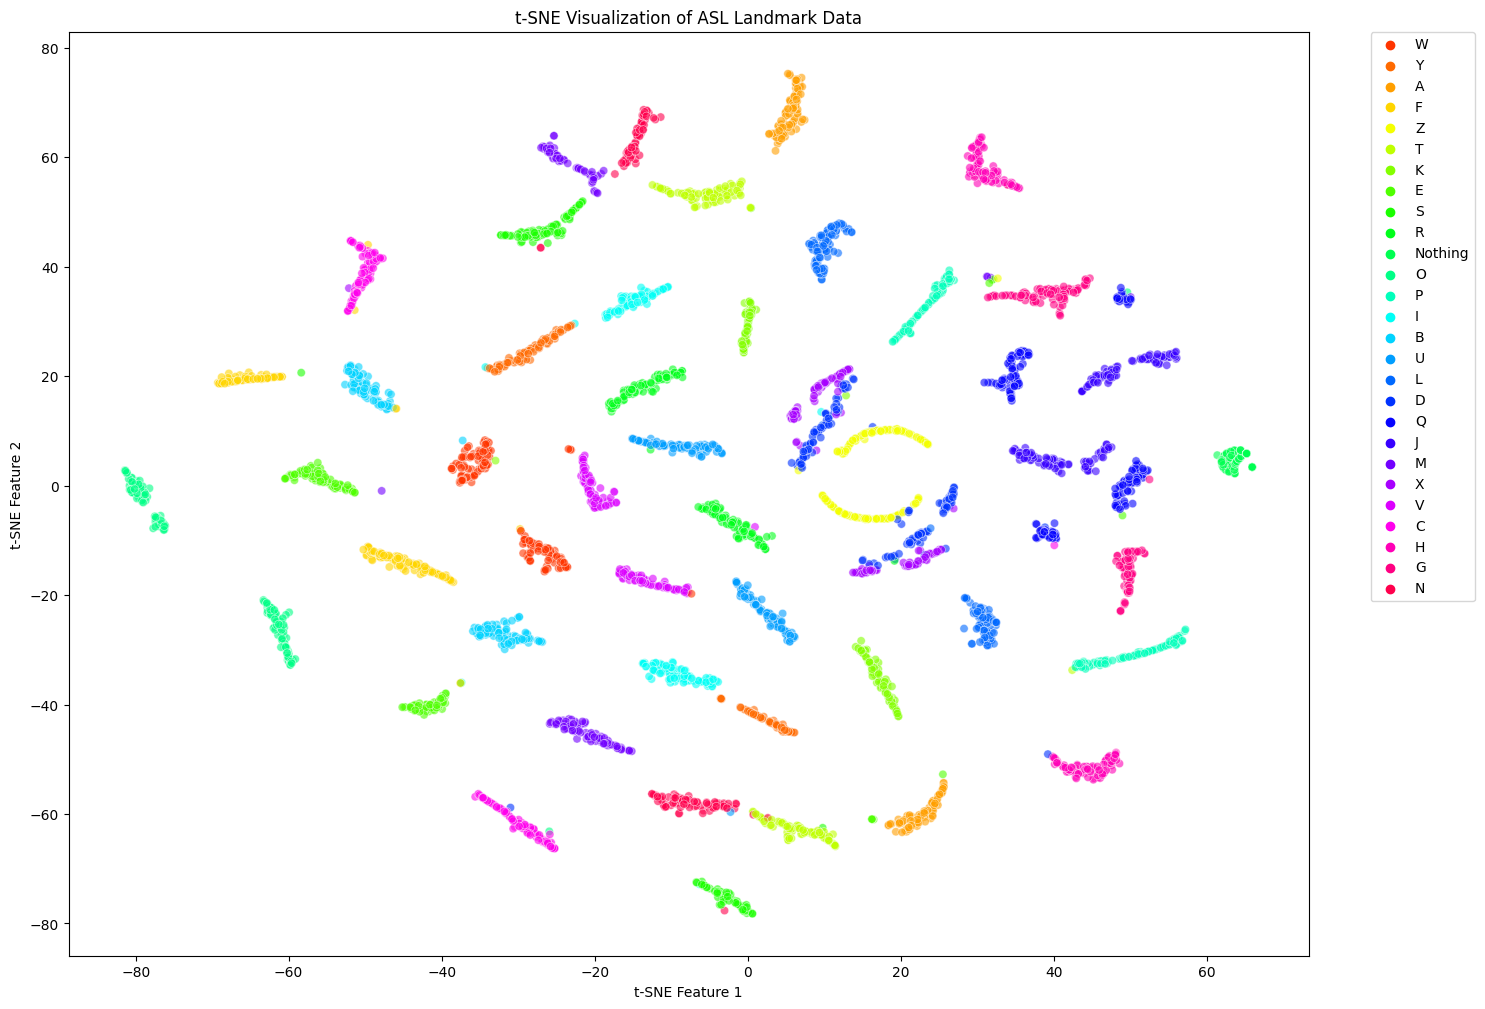

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# --- Create a t-SNE plot to visualize the landmark data ---
# t-SNE can be slow on large datasets so only a random sample is used.
# Take a random sample of 5000 data points to speed up the process.
sample_size = 5000
random_indices = np.random.choice(X_train.shape[0], size=sample_size, replace=False) # generate 5000 random choices
X_sample = X_train[random_indices] # select based on the random indices
y_sample_raw = y_train_raw.iloc[random_indices] # Use the original text labels for plotting

print("\nRunning t-SNE... This may take a few minutes.")

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_sample)

print("t-SNE complete. Plotting results...")

# Create the scatter plot
plt.figure(figsize=(16, 12))
sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1],
    hue=y_sample_raw,
    palette=sns.color_palette("hsv", len(np.unique(y_sample_raw))),
    legend="full",
    alpha=0.6
)
plt.title('t-SNE Visualization of ASL Landmark Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- Define the Neural Network Architecture ---
model = Sequential([
    # Input layer: The shape must match our number of features (42)
    Dense(128, activation='relu', input_shape=(X_train_final.shape[1],)),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    
    # Hidden Layer
    Dense(64, activation='relu'),
    Dropout(0.2),
    
    # Output Layer: Must have the same number of neurons as our classes
    Dense(num_classes, activation='softmax') # Softmax for multi-class classification
])

# Print a summary of the model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751560558.685290      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751560558.686036      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,515 (60.61 KB)

 Trainable params: 15,515 (60.61 KB)

 Non-trainable params: 0 (0.00 B)

## Configuration and training
#### Optimizer: the algorithm that updates the model's internal weights to minimize the error. The 'adam' optimizer is a highly efficient because it adapts the learning rate during training, which often leads to faster convergence.
#### Loss FUnction: The loss function calculates a score that measures how inaccurate the model's predictions are compared to the true labels
#### Metrics: monitor the model's performance


In [4]:
#  Compile the Model 
# This configures the model for training by specifying the learning process.
model.compile(
    optimizer='adam', # Adaptive Moment Estimation, reduce training time
    loss='categorical_crossentropy', # Good Loss function for one-hot encoded labels
    metrics=['accuracy'] # to monitor the accuracy during training.
)

print("Model compiled successfully. Starting training...")

#  Training the Model, learning happens here
#  fit the model to our training data and use the validation data to monitor its performance.
history = model.fit(
    X_train_final, 
    y_train_final,
    epochs=50, # One epoch is equivilent to one pass of the complte dataset through the model. 50 is a good start, meaning passing50 times
    batch_size=32, # The model will update its weights after seeing 32 samples.
    validation_data=(X_val, y_val) # at the end of each epoch, the models' performance is checked against the validation set, measuring how the model handles data it is not trained on
)

print("\nTraining complete!")

Model compiled successfully. Starting training...
Epoch 1/50


I0000 00:00:1751560562.175080      71 service.cc:148] XLA service 0x7dc47800aa30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751560562.176264      71 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751560562.176284      71 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751560562.511185      71 cuda_dnn.cc:529] Loaded cuDNN version 90300


 70/546 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0831 - loss: 3.1764

I0000 00:00:1751560564.311936      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


546/546 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3080 - loss: 2.3816 - val_accuracy: 0.9021 - val_loss: 0.5820
Epoch 2/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7867 - loss: 0.6770 - val_accuracy: 0.9596 - val_loss: 0.2686
Epoch 3/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9002 - loss: 0.3899 - val_accuracy: 0.9688 - val_loss: 0.1787
Epoch 4/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9260 - loss: 0.2873 - val_accuracy: 0.9700 - val_loss: 0.1439
Epoch 5/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9473 - loss: 0.2266 - val_accuracy: 0.9732 - val_loss: 0.1269
Epoch 6/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9497 - loss: 0.1953 - val_accuracy: 0.9807 - val_loss: 0.1132
Epoch 7/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9608 - loss: 0.1852 - val_accuracy: 0.9805 - val_loss: 0.1083
Epoch 8/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1529 - val_accuracy: 0.9819 - val_

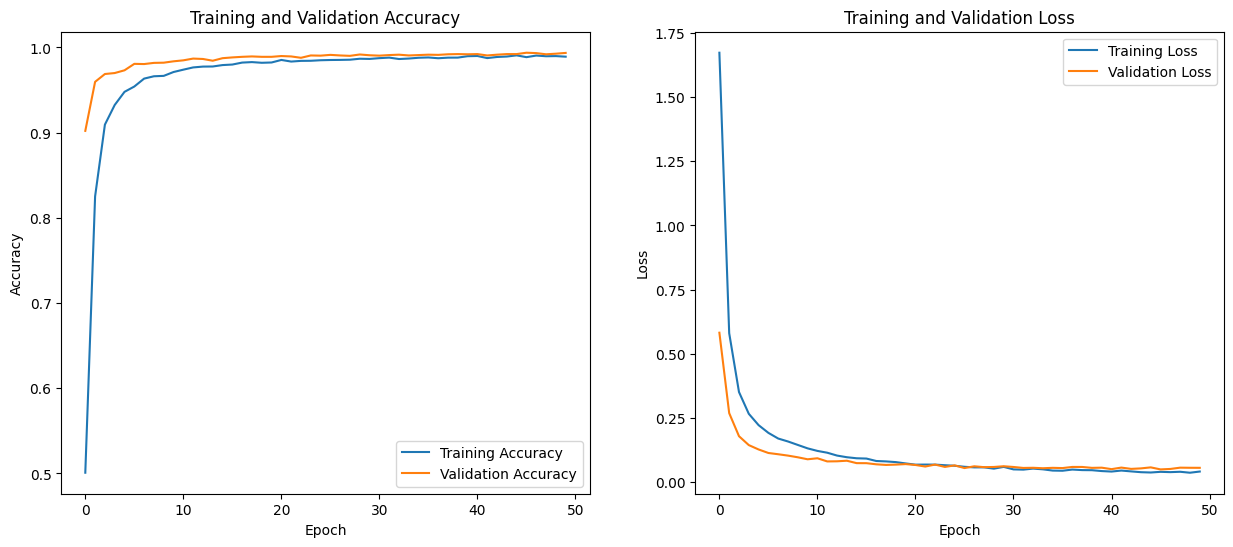

In [5]:
# --- Extract data from the history object ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc)) # This will be 1 to 50

# --- Create the plots ---
plt.figure(figsize=(15, 6))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

## Confusion Matrix

Evaluating model on the final test set...

Final Test Accuracy: 99.46%
Final Test Loss: 0.0390
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        92
           B       1.00      1.00      1.00        89
           C       1.00      1.00      1.00        92
           D       0.99      0.96      0.98        82
           E       0.99      0.99      0.99        76
           F       1.00      1.00      1.00        90
           G       0.99      1.00      0.99        98
           H       1.00      0.99      0.99        97
           I       1.00      1.00      1.00        91
           J       0.99      0.99      0.99        91
           K       1.00      1.00      1.00        92
           L       0.99      1.00      0.99        93
           M       0.98      1.00      0.99        85
           N       0.99      0.99      0.99        93
     Nothing       1.00      1.

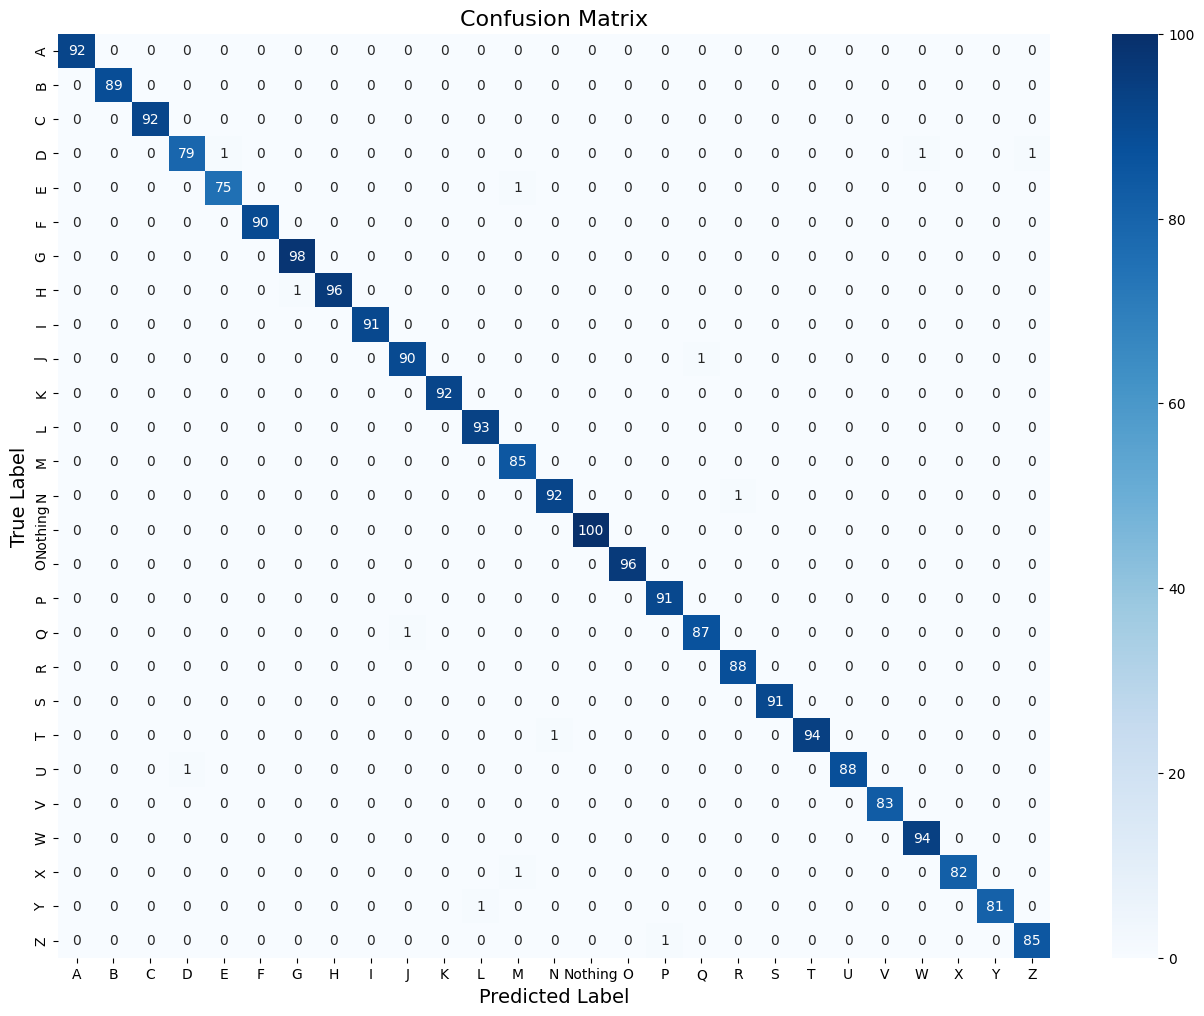

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Evaluate the model on the test data to get loss and accuracy ---
print("Evaluating model on the final test set...")
final_loss, final_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'\nFinal Test Accuracy: {final_accuracy * 100:.2f}%')
print(f'Final Test Loss: {final_loss:.4f}')


# --- 2. Generate a Classification Report for more detailed metrics ---
# Get the model's predictions for the test set
y_pred_one_hot = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_one_hot, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
# Use the label_encoder to get the actual class names (A, B, C...)
print(classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_))


# --- 3. Generate and Plot a Confusion Matrix ---
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## Saving the Model

In [7]:
# --- Save the trained model to a file ---
model.save('asl_alphabet_model.h5')

print("\nModel successfully saved as 'asl_alphabet_model.h5'")


Model successfully saved as 'asl_alphabet_model.h5'
